# Organización de Datos

Trabajo Práctico N°1: TLC Trip Record Data 

Grupo 02 - 2C2024

Cátedra Ing. Rodriguez, Juan Manuel

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Descarga de datos

In [87]:
from scripts.download_data import download_file

url = [
    'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-04.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-05.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-06.parquet',
]

dest_folder = './datasets/raw/EJ1'

for u in url:
    download_file(u, dest_folder)

El archivo yellow_tripdata_2023-04.parquet ya existe en la carpeta ./datasets/raw/EJ1.
El archivo yellow_tripdata_2023-05.parquet ya existe en la carpeta ./datasets/raw/EJ1.
El archivo yellow_tripdata_2023-06.parquet ya existe en la carpeta ./datasets/raw/EJ1.


## Análisis Exploratorio de Datos

In [88]:
yellow_april = pd.read_parquet('./datasets/raw/EJ1/yellow_tripdata_2023-04.parquet')
yellow_may = pd.read_parquet('./datasets/raw/EJ1/yellow_tripdata_2023-05.parquet')
yellow_june = pd.read_parquet('./datasets/raw/EJ1/yellow_tripdata_2023-06.parquet')

In [89]:
yellow = pd.concat([yellow_april, yellow_may, yellow_june], ignore_index=True)

In [90]:
yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109133 entries, 0 to 10109132
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

In [91]:
yellow.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-04-01 00:14:49,2023-04-01 00:45:01,2.0,4.90,1.0,N,48,223,1,28.9,3.5,0.5,6.0,0.00,1.0,39.9,2.5,0.00
1,2,2023-04-01 00:00:24,2023-04-01 00:56:19,1.0,21.89,2.0,N,132,43,2,70.0,0.0,0.5,0.0,6.55,1.0,81.8,2.5,1.25
2,1,2023-04-01 00:03:50,2023-04-01 00:14:42,2.0,1.30,1.0,N,148,113,1,11.4,3.5,0.5,2.0,0.00,1.0,18.4,2.5,0.00
3,1,2023-04-01 00:53:18,2023-04-01 01:01:28,1.0,1.50,1.0,N,249,79,1,10.0,3.5,0.5,1.0,0.00,1.0,16.0,2.5,0.00
4,2,2023-04-01 00:07:00,2023-04-01 00:17:16,2.0,1.49,1.0,N,158,246,1,11.4,1.0,0.5,1.0,0.00,1.0,17.4,2.5,0.00


## a) Exploración Inicial

### Variables Cuantitativas

In [92]:
quantitative_variables = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

In [93]:
yellow[quantitative_variables].describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,9.816760e+06,1.010913e+07,1.010913e+07,1.010913e+07,1.010913e+07,1.010913e+07,1.010913e+07,1.010913e+07,1.010913e+07,9.816760e+06,9.816760e+06
mean,1.369960e+00,4.272131e+00,1.974530e+01,1.602694e+00,4.863890e-01,3.573171e+00,5.998055e-01,9.808940e-01,2.877201e+01,2.267157e+00,1.451095e-01
std,8.938093e-01,2.610343e+02,1.232059e+02,1.861751e+00,1.053106e-01,4.134437e+00,2.212933e+00,1.921965e-01,1.240302e+02,7.885923e-01,4.872387e-01
min,0.000000e+00,0.000000e+00,-8.700000e+02,-7.500000e+00,-5.000000e-01,-4.110000e+02,-7.255000e+01,-1.000000e+00,-9.005000e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,1.090000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,1.000000e+00,1.820000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,1.000000e+00,3.500000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.470000e+00,0.000000e+00,1.000000e+00,3.107000e+01,2.500000e+00,0.000000e+00
max,9.000000e+00,3.423448e+05,3.869836e+05,9.638000e+01,5.750000e+00,7.118800e+02,6.655600e+02,1.000000e+00,3.869876e+05,2.500000e+00,1.750000e+00


Moda

In [94]:
yellow[quantitative_variables].mode()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1.0,1.0,8.6,0.0,0.5,0.0,0.0,1.0,16.8,2.5,0.0


median

In [95]:
yellow[quantitative_variables].median()

passenger_count           1.00
trip_distance             1.82
fare_amount              13.50
extra                     1.00
mta_tax                   0.50
tip_amount                2.86
tolls_amount              0.00
improvement_surcharge     1.00
total_amount             21.00
congestion_surcharge      2.50
Airport_fee               0.00
dtype: float64

### Variables Cualitativas

In [96]:
qualitative_variables = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']

Cantidad de valores posibles

In [97]:
yellow[qualitative_variables].nunique()

VendorID                3
RatecodeID              7
store_and_fwd_flag      2
PULocationID          262
DOLocationID          261
payment_type            6
dtype: int64

frecuencias de cada uno

In [98]:
yellow['VendorID'].value_counts()

VendorID
2    7419030
1    2688136
6       1967
Name: count, dtype: int64

### análisis gráfico de las distribuciones de las variables más relevantes

Trip_distance: Distribución de las distancias recorridas por los taxis. Con el histograma podremos observar si la mayoría de los viajes son cortos o largos.

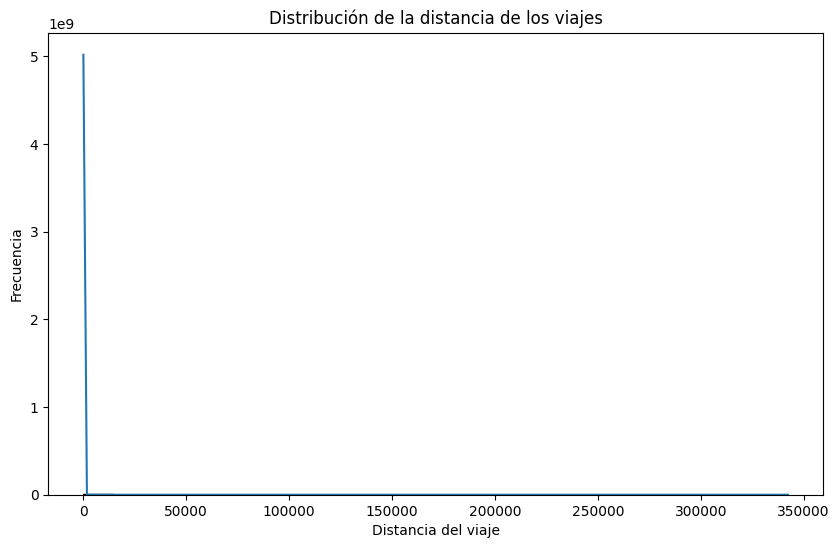

In [99]:
plt.figure(figsize=(10, 6))
sns.histplot(yellow['trip_distance'], bins=24, kde=True)
plt.title('Distribución de la distancia de los viajes')
plt.xlabel('Distancia del viaje')
plt.ylabel('Frecuencia')
plt.show()

Passenger_count: Distribución de la cantidad de pasajeros que lleva cada taxi.

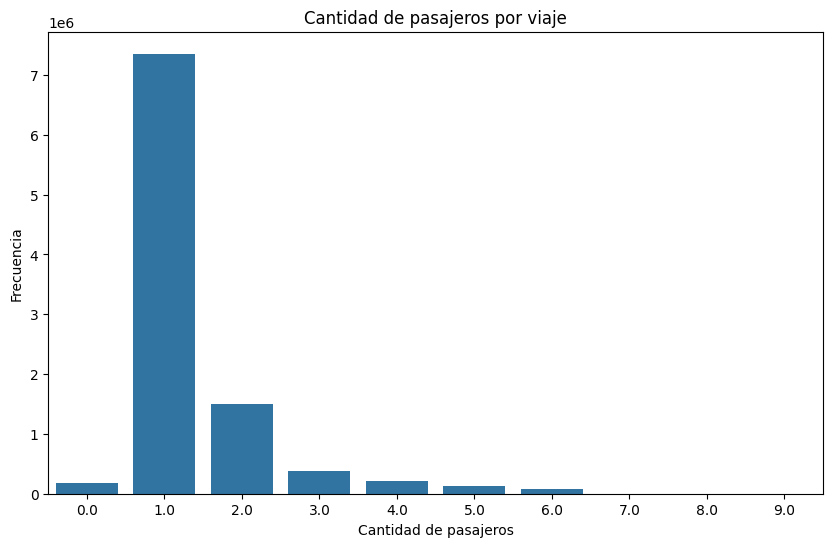

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(data=yellow, x='passenger_count')
plt.title('Cantidad de pasajeros por viaje')
plt.xlabel('Cantidad de pasajeros')
plt.ylabel('Frecuencia')
plt.show()

Payment_type: Cómo prefieren pagar los usuarios (tarjeta, efectivo, etc.).

In [101]:
payment_type = { 1: 'Credit card',
                 2: 'Cash', 
                 3: 'No charge', 
                 4: 'Dispute', 
                 5: 'Unknown', 
                 6: 'Voided trip'}

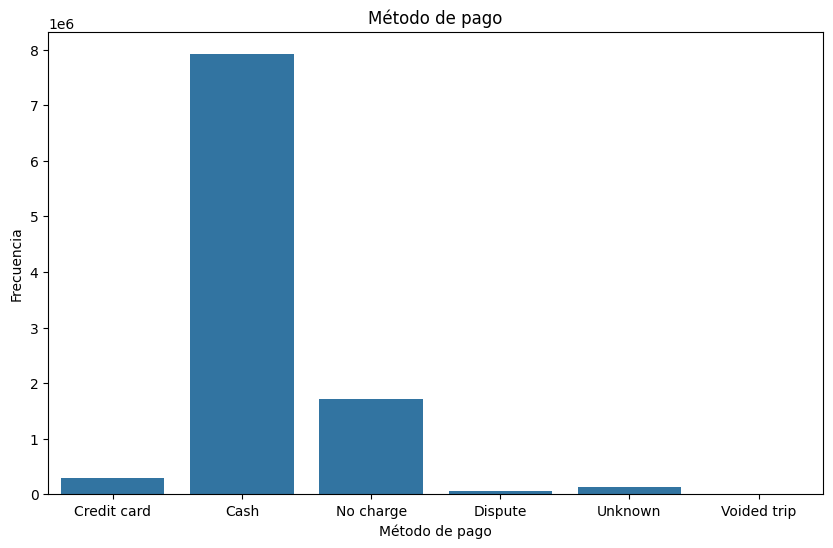

In [102]:
plt.figure(figsize=(10, 6))

sns.countplot(data=yellow, x='payment_type')

plt.title('Método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')

plt.xticks(ticks=range(6), labels=[payment_type[i] for i in range(1, 7)])

plt.show()

### Analizar las correlaciones existentes entre las variables.

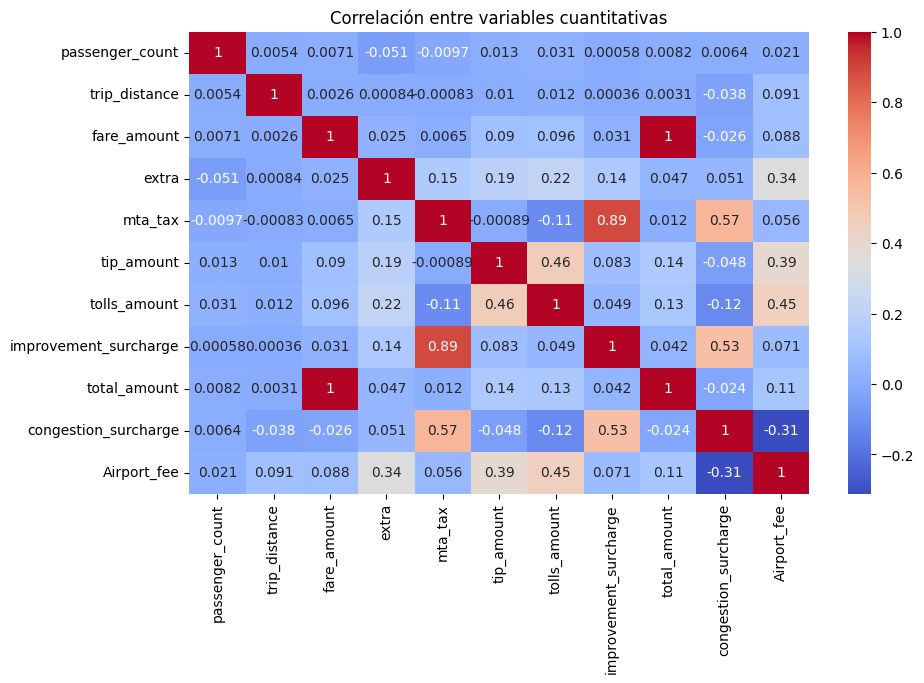

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(yellow[quantitative_variables].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables cuantitativas')
plt.show()

## b) Datos Faltantes

In [104]:
yellow.isnull().sum()[yellow.isnull().sum() > 0]

passenger_count         292373
RatecodeID              292373
store_and_fwd_flag      292373
congestion_surcharge    292373
Airport_fee             292373
dtype: int64

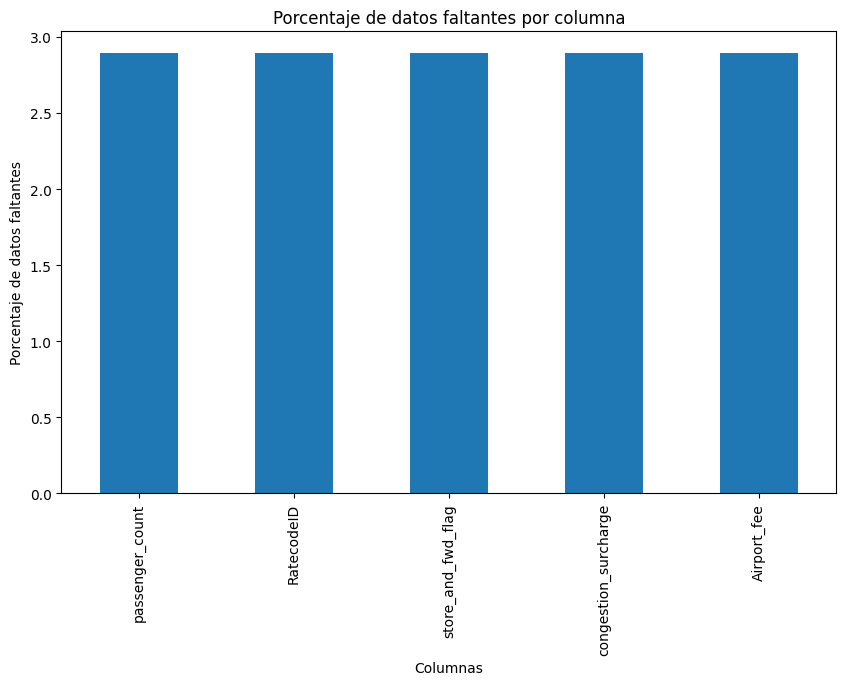

In [105]:
missing = yellow.isnull().sum()[yellow.isnull().sum() > 0]
missing_percentage = missing / yellow.shape[0] * 100

# df.plot(kind="bar", stacked=True
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Porcentaje de datos faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de datos faltantes')
plt.show()

- Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de valores, eliminación de registros incompletos, etc

datos faltantes

In [106]:
missing_rows = yellow[yellow.isnull().any(axis=1)]
missing_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3197560,2,2023-04-01 00:04:29,2023-04-01 00:14:54,NaN,1.46,NaN,None,234,233,0,13.53,0.00,0.5,3.51,0.00,1.0,21.04,NaN,NaN
3197561,2,2023-04-01 00:51:05,2023-04-01 00:51:27,NaN,0.00,NaN,None,33,33,0,17.33,0.00,0.5,4.71,0.00,1.0,23.54,NaN,NaN
3197562,2,2023-04-01 00:04:35,2023-04-01 00:29:30,NaN,4.17,NaN,None,211,236,0,25.49,0.00,0.5,5.90,0.00,1.0,35.39,NaN,NaN
3197563,2,2023-04-01 00:50:06,2023-04-01 01:08:59,NaN,3.26,NaN,None,148,68,0,18.64,0.00,0.5,4.53,0.00,1.0,27.17,NaN,NaN
3197564,2,2023-04-01 00:22:26,2023-04-01 00:37:49,NaN,2.62,NaN,None,158,87,0,16.62,0.00,0.5,2.06,0.00,1.0,22.68,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109128,2,2023-06-30 23:30:21,2023-07-01 00:00:46,NaN,9.20,NaN,None,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,NaN,NaN
10109129,1,2023-06-30 23:34:22,2023-07-01 00:32:59,NaN,20.20,NaN,None,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,NaN,NaN
10109130,2,2023-06-30 23:45:00,2023-07-01 00:10:00,NaN,6.16,NaN,None,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,NaN,NaN
10109131,2,2023-06-30 23:13:38,2023-06-30 23:51:19,NaN,11.65,NaN,None,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,NaN,NaN


Se prodria decir que la cantidad de datos faltantes es baja, por lo que se podria optar por eliminar los registros que contengan datos faltantes. (pero no si eso es lo que quiere la catedra)

Mal ingresados

In [107]:
# Mostramos todos los vendedores que no son 1 ni 2
yellow[~yellow['VendorID'].isin([1, 2]) & yellow['RatecodeID'].notna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


In [108]:
# RateCodeID solo puede tomar valores entre 1 y 6
yellow[~yellow['RatecodeID'].between(1, 6) & yellow['RatecodeID'].notna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
76,1,2023-04-01 00:55:24,2023-04-01 01:32:23,1.0,8.2,99.0,N,161,95,1,39.5,0.0,0.5,0.0,6.55,1.0,47.55,0.0,0.0
817,1,2023-04-01 00:07:20,2023-04-01 00:33:52,1.0,10.3,99.0,N,226,130,1,37.5,0.0,0.5,0.0,0.00,1.0,39.00,0.0,0.0
4289,1,2023-04-01 00:00:44,2023-04-01 00:23:15,1.0,5.1,99.0,N,41,137,1,24.2,0.0,0.5,0.0,0.00,1.0,25.70,0.0,0.0
4290,1,2023-04-01 00:26:06,2023-04-01 00:51:08,1.0,5.0,99.0,N,137,41,1,20.2,0.0,0.5,0.0,0.00,1.0,21.70,0.0,0.0
4291,1,2023-04-01 00:58:10,2023-04-01 01:11:42,1.0,1.9,99.0,N,41,116,1,15.2,0.0,0.5,0.0,0.00,1.0,16.70,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001947,1,2023-06-30 22:11:55,2023-06-30 22:50:50,1.0,7.6,99.0,N,41,254,1,35.5,0.0,0.5,0.0,0.00,1.0,37.00,0.0,0.0
10002832,1,2023-06-30 22:46:50,2023-06-30 23:33:55,1.0,13.2,99.0,N,55,37,1,45.5,0.0,0.5,0.0,0.00,1.0,47.00,0.0,0.0
10005021,1,2023-06-30 23:22:42,2023-06-30 23:39:06,1.0,0.0,99.0,N,90,232,1,18.2,0.0,0.5,0.0,0.00,1.0,19.70,0.0,0.0
10007244,1,2023-06-30 23:05:53,2023-06-30 23:29:05,1.0,0.0,99.0,N,48,88,1,18.2,0.0,0.5,0.0,0.00,1.0,19.70,0.0,0.0


Para imputar los datos de `RatecodeID` se podría analizar la relación con la variable `fare_amount` y `trip_distance` para poder imputar los valores faltantes.

In [109]:
# Store_and_fwd_flag solo puede tomar valores 'Y' o 'N'
yellow[~yellow['store_and_fwd_flag'].isin(['Y', 'N']) & yellow['RatecodeID'].notna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


## c) Valores atípicos

univariada